### Урок 7.

####    1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1й способ

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

In [10]:
b = (np.mean(zp * ks) - np.mean(ks) * np.mean(zp)) / (np.mean(zp ** 2) - (np.mean(zp)) ** 2)
b

2.620538882402765

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [12]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

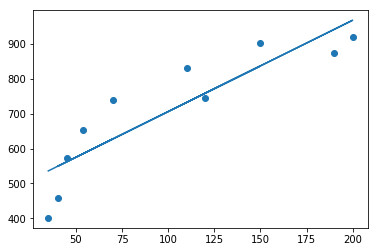

In [14]:
plt.scatter(zp,ks);
plt.plot(zp, a + b * zp);

#### Ответ (первый способ): ks = 444.18 + 2.62 * zp

2й способ (матричный)

2.1. Без интерсепта

$W = (X^T \cdot X)^{-1} \cdot X^T \cdot y$)

In [41]:
X = zp.reshape(10,1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [42]:
y = ks.reshape(10,1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [45]:
b0 = np.linalg.inv(X.T @ X) @ X.T @ y
b0

array([[5.88982042]])

In [46]:
b0 = b0[0][0]
b0

5.889820420132689

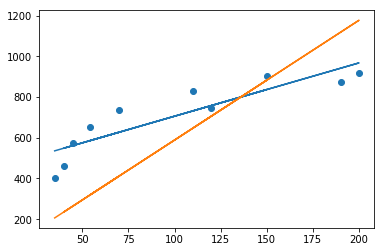

In [33]:
plt.scatter(zp,ks);
plt.plot(zp, a + b * zp);
plt.plot(zp, b0 * zp);

#### Ответ (2.1 без интерсепта): ks = 5.89 * zp

2.2. Матричный способ с интерсептом

$W = (X \cdot X^T)^{-1} \cdot X^T \cdot y$)

In [48]:
X2 = np.hstack([np.ones((10,1)), X])
X2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [49]:
b2 = np.linalg.inv(X2.T @ X2) @ X2.T @ y
b2

array([[444.17735732],
       [  2.62053888]])

#### Ответ (второй способ с интерсептом): ks = 444.18 + 2.62 * zp

#### 2.  Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).


In [50]:
X = zp
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [51]:
y = ks
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [52]:
alpha = 1e-6

In [53]:
B1 = 0.1

In [56]:
n = zp.shape[0]
n

10

In [59]:
def mse_(B1, y=y, X=X, n=n):
    return np.sum((B1 * X - y) ** 2) / n

In [73]:
mse_(5.889820420132689) # ранее найденный ответ

56516.85841571941

In [68]:
for i in range(10):
    B1 -= alpha * (2 / n) * np.sum((B1 * X - y) * X)
    print(f'Iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration: 0, B1 = 1.6319792141937546, mse = 306275.7568040035
Iteration: 1, B1 = 1.7492963645092312, mse = 292702.0547141798
Iteration: 2, B1 = 1.8633810519186353, mse = 279866.0456139243
Iteration: 3, B1 = 1.9743223411189108, mse = 267727.6379391773
Iteration: 4, B1 = 2.082206842789593, mse = 256248.91899097856
Iteration: 5, B1 = 2.187118781208843, mse = 245394.03652020302
Iteration: 6, B1 = 2.2891400600064395, mse = 235129.08674783848
Iteration: 7, B1 = 2.38835032610507, mse = 225422.0084710492
Iteration: 8, B1 = 2.484827031899832, mse = 216242.48292428063
Iteration: 9, B1 = 2.5786454957244893, mse = 207561.83908263582


In [69]:
for i in range(100):
    B1 -= alpha * (2 / n) * np.sum((B1 * X - y) * X)
    if i%10 == 0:
        print(f'Iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration: 0, B1 = 2.6698789606516935, mse = 199352.96411174876
Iteration: 10, B1 = 3.4547782236263824, mse = 138204.25062502263
Iteration: 20, B1 = 4.04834889855975, mse = 103233.54824312925
Iteration: 30, B1 = 4.497229618367758, mse = 83233.94472982832
Iteration: 40, B1 = 4.836690291080364, mse = 71796.25222021657
Iteration: 50, B1 = 5.093403362579137, mse = 65255.0820486468
Iteration: 60, B1 = 5.287539550879594, mse = 61514.21323463749
Iteration: 70, B1 = 5.434352720103083, mse = 59374.825462025976
Iteration: 80, B1 = 5.54537842245223, mse = 58151.31823171113
Iteration: 90, B1 = 5.629340281237233, mse = 57451.59938606899


In [72]:
for i in range(1000):
    B1 -= alpha * (2 / n) * np.sum((B1 * X - y) * X)
    if i%100 == 0:
        print(f'Iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration: 0, B1 = 5.889820251337954, mse = 56516.8584157198
Iteration: 100, B1 = 5.889820409806407, mse = 56516.8584157194
Iteration: 200, B1 = 5.889820419500961, mse = 56516.8584157194
Iteration: 300, B1 = 5.8898204200940425, mse = 56516.85841571941
Iteration: 400, B1 = 5.889820420130325, mse = 56516.85841571941
Iteration: 500, B1 = 5.889820420132545, mse = 56516.85841571941
Iteration: 600, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 700, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 800, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 900, B1 = 5.889820420132673, mse = 56516.85841571943


#### Ответ: коэффициент линейной регрессии без интерсепта = 5.89

#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?


#### Ответ: Таблица критических точек распределения Стьюдента используется в случаях, когда нам неизвестны параметры генеральной совокупности (в частности, дисперсия) и когда число степеней свободы менее 30 (или число измерений менее 31). В остальных случаях используется таблица значений функции Лапласа

#### 4. Произвести вычисления как в пункте 2, но с вычислением intercept.
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).



In [75]:
X = zp
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [76]:
y = ks
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [111]:
alpha = 2 * 1e-5

In [112]:
B1 = 0.1
B0 = 0.1

In [79]:
n = zp.shape[0]
n

10

In [88]:
def mse_2(B0, B1, y=y, X=X, n=n):
    return np.sum((B0 + B1 * X - y) ** 2) / n

In [89]:
mse_2(444.17735732, 2.62053888) # ранее найденный ответ

6470.414201176658

In [113]:
for i in range(10):
    B1r = B1
    B1 -= alpha * (2 / n) * np.sum((B0 + B1 * X - y) * X)
    B0 -= alpha * (2 / n) * np.sum((B0 + B1r * X - y))

    print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_2(B0, B1)}')

Iteration: 0, B0 = 0.1279864, B1 = 3.2901560000000005, mse = 149526.33499003082
Iteration: 1, B0 = 0.143032407808, B1 = 4.7222183611776005, mse = 75232.34266515492
Iteration: 2, B0 = 0.15226936883875133, B1 = 5.365061682747558, mse = 60260.0500892393
Iteration: 3, B0 = 0.1588985878787737, B1 = 5.653619727045948, mse = 57242.072360116246
Iteration: 4, B0 = 0.16435715032236017, B1 = 5.783136933108663, mse = 56633.08906034792
Iteration: 5, B0 = 0.16929017263565854, B1 = 5.841259729600363, mse = 56509.558452096186
Iteration: 6, B0 = 0.17398725156549405, B1 = 5.867333137027659, mse = 56483.85469825989
Iteration: 7, B0 = 0.17857838887164726, B1 = 5.879019376912299, mse = 56477.86470847383
Iteration: 8, B0 = 0.1831219431433361, B1 = 5.884247129048236, mse = 56475.84738835656
Iteration: 9, B0 = 0.18764411191019073, B1 = 5.886575626525009, mse = 56474.63064407355


In [122]:
B1 = 0.1
B0 = 0.1

In [123]:
for i in range(10001):
    B1r = B1
    B1 -= alpha * (2 / n) * np.sum((B0 + B1 * X - y) * X)
    B0 -= alpha * (2 / n) * np.sum((B0 + B1r * X - y))
    if i%1000 == 0:
        print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_2(B0, B1)}')

Iteration: 0, B0 = 0.1279864, B1 = 3.2901560000000005, mse = 149526.33499003082
Iteration: 1000, B0 = 4.629510143752532, B1 = 5.855805372918512, mse = 55479.060830672504
Iteration: 2000, B0 = 9.06665783699729, B1 = 5.823146004120545, mse = 54494.590065301876
Iteration: 3000, B0 = 13.459013410844888, B1 = 5.790816325125074, mse = 53529.89504879442
Iteration: 4000, B0 = 17.80702903279099, B1 = 5.758813007779417, mse = 52584.57853193073
Iteration: 5000, B0 = 22.111152305790633, B1 = 5.7271327575279285, mse = 51658.25124531265
Iteration: 6000, B0 = 26.371826314336523, B1 = 5.695772313072843, mse = 50750.53173906716
Iteration: 7000, B0 = 30.58948967007185, B1 = 5.664728446038545, mse = 49861.046225770166
Iteration: 8000, B0 = 34.76457655694316, B1 = 5.633997960639225, mse = 48989.42842652537
Iteration: 9000, B0 = 38.89751677589644, B1 = 5.603577693349893, mse = 48135.31942013544
Iteration: 10000, B0 = 42.98873578912336, B1 = 5.573464512580712, mse = 47298.367495302686


In [120]:
B1 = 0.1
B0 = 0.1

In [121]:
for i in range(2000001):
    B1r = B1
    B1 -= alpha * (2 / n) * np.sum((B0 + B1 * X - y) * X)
    B0 -= alpha * (2 / n) * np.sum((B0 + B1r * X - y))
    if i%200000 == 0:
        print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_2(B0, B1)}')

Iteration: 0, B0 = 0.1279864, B1 = 3.2901560000000005, mse = 149526.33499003082
Iteration: 200000, B0 = 385.8148880087486, B1 = 3.0501124600955842, mse = 7334.441993584616
Iteration: 400000, B0 = 436.50630817310923, B1 = 2.67700119572162, mse = 6485.341111576515
Iteration: 600000, B0 = 443.1690895836179, B1 = 2.6279601787553992, mse = 6470.672077897803
Iteration: 800000, B0 = 444.04483257879133, B1 = 2.6215143231227036, mse = 6470.418656244823
Iteration: 1000000, B0 = 444.1599385302417, B1 = 2.6206670924287647, mse = 6470.414278142239
Iteration: 1200000, B0 = 444.17506783203214, B1 = 2.620555734078538, mse = 6470.414202506315
Iteration: 1400000, B0 = 444.1770563979531, B1 = 2.6205410973541645, mse = 6470.414201199627
Iteration: 1600000, B0 = 444.1773177711795, B1 = 2.6205391735316583, mse = 6470.414201177057
Iteration: 1800000, B0 = 444.1773521255662, B1 = 2.6205389206681833, mse = 6470.414201176669
Iteration: 2000000, B0 = 444.1773566410366, B1 = 2.6205388874323243, mse = 6470.4142011

#### Ответ: коэффициенты линейной регрессии: B0 = 444.177, B1 = 2.62